In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Load Dataset

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Define number of classes

In [3]:
NUM_CLASSES = 4

# Split the dataset

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Create the model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 1.4609 - accuracy: 0.3619
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 2s 2s/step - loss: 1.4609 - accuracy: 0.3619 - val_loss: 1.2920 - val_accuracy: 0.4000
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 1.4526 - accuracy: 0.2952
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 105ms/step - loss: 1.4526 - accuracy: 0.2952 - val_loss: 1.2832 - val_accuracy: 0.4000


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 1.4215 - accuracy: 0.3714
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 77ms/step - loss: 1.4215 - accuracy: 0.3714 - val_loss: 1.2746 - val_accuracy: 0.4000
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 1.3589 - accuracy: 0.3524
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 77ms/step - loss: 1.3589 - accuracy: 0.3524 - val_loss: 1.2658 - val_accuracy: 0.4000
Epoch 5/1000
1/1 [==============================] - ETA: 0s - loss: 1.4519 - accuracy: 0.2762
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 102ms/step - loss: 1.4519 - accuracy: 0.2762 - val_loss: 1.2571 - val_accuracy: 0.4571
Epoch 6/1000
1/1 [==============================] - ETA: 0s - loss: 1.3398 - accuracy: 0.4000
Epoch 6: sa

1/1 [==============================] - ETA: 0s - loss: 1.1747 - accuracy: 0.6000
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 116ms/step - loss: 1.1747 - accuracy: 0.6000 - val_loss: 1.0817 - val_accuracy: 0.8000
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 1.1613 - accuracy: 0.5524
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 117ms/step - loss: 1.1613 - accuracy: 0.5524 - val_loss: 1.0753 - val_accuracy: 0.8000
Epoch 32/1000
1/1 [==============================] - ETA: 0s - loss: 1.2151 - accuracy: 0.5429
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 102ms/step - loss: 1.2151 - accuracy: 0.5429 - val_loss: 1.0689 - val_accuracy: 0.8000
Epoch 33/1000
1/1 [==============================] - ETA: 0s - loss: 1.1941 - accuracy: 0.5333
Epoch 33: saving

1/1 [==============================] - ETA: 0s - loss: 1.0531 - accuracy: 0.6190
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 91ms/step - loss: 1.0531 - accuracy: 0.6190 - val_loss: 0.8846 - val_accuracy: 0.8571
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 1.0745 - accuracy: 0.5810
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 1.0745 - accuracy: 0.5810 - val_loss: 0.8767 - val_accuracy: 0.8571
Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 1.0155 - accuracy: 0.6286
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 87ms/step - loss: 1.0155 - accuracy: 0.6286 - val_loss: 0.8684 - val_accuracy: 0.8571
Epoch 60/1000
1/1 [==============================] - ETA: 0s - loss: 1.0465 - accuracy: 0.5619
Epoch 60: saving mo

1/1 [==============================] - 0s 87ms/step - loss: 0.8954 - accuracy: 0.6571 - val_loss: 0.6823 - val_accuracy: 0.8857
Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 0.9235 - accuracy: 0.6667
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.9235 - accuracy: 0.6667 - val_loss: 0.6756 - val_accuracy: 0.8857
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: 0.9650 - accuracy: 0.5810
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 77ms/step - loss: 0.9650 - accuracy: 0.5810 - val_loss: 0.6689 - val_accuracy: 0.8857
Epoch 87/1000
1/1 [==============================] - ETA: 0s - loss: 0.8728 - accuracy: 0.6381
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 85ms/step - loss: 0.8728 - accuracy: 0.6381 - val_loss: 0.

Epoch 112/1000
1/1 [==============================] - ETA: 0s - loss: 0.7060 - accuracy: 0.7238
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 67ms/step - loss: 0.7060 - accuracy: 0.7238 - val_loss: 0.5311 - val_accuracy: 0.9714
Epoch 113/1000
1/1 [==============================] - ETA: 0s - loss: 0.8087 - accuracy: 0.6667
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 77ms/step - loss: 0.8087 - accuracy: 0.6667 - val_loss: 0.5263 - val_accuracy: 0.9714
Epoch 114/1000
1/1 [==============================] - ETA: 0s - loss: 0.7483 - accuracy: 0.6095
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 0.7483 - accuracy: 0.6095 - val_loss: 0.5215 - val_accuracy: 0.9714
Epoch 115/1000
1/1 [==============================] - ETA: 0s - loss: 0.7604 - accuracy: 0.647

1/1 [==============================] - ETA: 0s - loss: 0.6373 - accuracy: 0.7714
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 78ms/step - loss: 0.6373 - accuracy: 0.7714 - val_loss: 0.4481 - val_accuracy: 0.8857
Epoch 140/1000
1/1 [==============================] - ETA: 0s - loss: 0.6657 - accuracy: 0.7143
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 88ms/step - loss: 0.6657 - accuracy: 0.7143 - val_loss: 0.4445 - val_accuracy: 0.8857
Epoch 141/1000
1/1 [==============================] - ETA: 0s - loss: 0.6122 - accuracy: 0.7714
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 96ms/step - loss: 0.6122 - accuracy: 0.7714 - val_loss: 0.4404 - val_accuracy: 0.8857
Epoch 142/1000
1/1 [==============================] - ETA: 0s - loss: 0.6131 - accuracy: 0.7429
Epoch 142: sa

1/1 [==============================] - ETA: 0s - loss: 0.6373 - accuracy: 0.7143
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.6373 - accuracy: 0.7143 - val_loss: 0.3720 - val_accuracy: 0.9714
Epoch 167/1000
1/1 [==============================] - ETA: 0s - loss: 0.5460 - accuracy: 0.8190
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.5460 - accuracy: 0.8190 - val_loss: 0.3700 - val_accuracy: 0.9714
Epoch 168/1000
1/1 [==============================] - ETA: 0s - loss: 0.5470 - accuracy: 0.7905
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.5470 - accuracy: 0.7905 - val_loss: 0.3680 - val_accuracy: 0.9714
Epoch 169/1000
1/1 [==============================] - ETA: 0s - loss: 0.6043 - accuracy: 0.7238
Epoch 169: sa

1/1 [==============================] - ETA: 0s - loss: 0.4918 - accuracy: 0.8571
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 89ms/step - loss: 0.4918 - accuracy: 0.8571 - val_loss: 0.3336 - val_accuracy: 0.9714
Epoch 194/1000
1/1 [==============================] - ETA: 0s - loss: 0.5671 - accuracy: 0.7619
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 57ms/step - loss: 0.5671 - accuracy: 0.7619 - val_loss: 0.3334 - val_accuracy: 0.9714
Epoch 195/1000
1/1 [==============================] - ETA: 0s - loss: 0.4381 - accuracy: 0.8476
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.4381 - accuracy: 0.8476 - val_loss: 0.3333 - val_accuracy: 0.9714
Epoch 196/1000
1/1 [==============================] - ETA: 0s - loss: 0.5660 - accuracy: 0.7810
Epoch 196: sa

1/1 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.8476
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.4665 - accuracy: 0.8476 - val_loss: 0.2834 - val_accuracy: 0.9714
Epoch 221/1000
1/1 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.7905
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 71ms/step - loss: 0.4936 - accuracy: 0.7905 - val_loss: 0.2818 - val_accuracy: 0.9714
Epoch 222/1000
1/1 [==============================] - ETA: 0s - loss: 0.4672 - accuracy: 0.8476
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 79ms/step - loss: 0.4672 - accuracy: 0.8476 - val_loss: 0.2806 - val_accuracy: 0.9714
Epoch 223/1000
1/1 [==============================] - ETA: 0s - loss: 0.5426 - accuracy: 0.8000
Epoch 223: sa

1/1 [==============================] - ETA: 0s - loss: 0.3511 - accuracy: 0.9143
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.3511 - accuracy: 0.9143 - val_loss: 0.2480 - val_accuracy: 0.9714
Epoch 248/1000
1/1 [==============================] - ETA: 0s - loss: 0.3884 - accuracy: 0.8381
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 53ms/step - loss: 0.3884 - accuracy: 0.8381 - val_loss: 0.2464 - val_accuracy: 0.9714
Epoch 249/1000
1/1 [==============================] - ETA: 0s - loss: 0.3960 - accuracy: 0.8476
Epoch 249: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 60ms/step - loss: 0.3960 - accuracy: 0.8476 - val_loss: 0.2449 - val_accuracy: 0.9714
Epoch 250/1000
1/1 [==============================] - ETA: 0s - loss: 0.3571 - accuracy: 0.9048
Epoch 250: sa

1/1 [==============================] - ETA: 0s - loss: 0.4088 - accuracy: 0.8286
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 0.4088 - accuracy: 0.8286 - val_loss: 0.2214 - val_accuracy: 0.9714
Epoch 275/1000
1/1 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.8476
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 49ms/step - loss: 0.4158 - accuracy: 0.8476 - val_loss: 0.2200 - val_accuracy: 0.9714
Epoch 276/1000
1/1 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.8190
Epoch 276: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.5028 - accuracy: 0.8190 - val_loss: 0.2183 - val_accuracy: 0.9714
Epoch 277/1000
1/1 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.8667
Epoch 277: sa

1/1 [==============================] - ETA: 0s - loss: 0.3933 - accuracy: 0.8381
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 53ms/step - loss: 0.3933 - accuracy: 0.8381 - val_loss: 0.2017 - val_accuracy: 0.9714
Epoch 302/1000
1/1 [==============================] - ETA: 0s - loss: 0.3521 - accuracy: 0.8667
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.3521 - accuracy: 0.8667 - val_loss: 0.2011 - val_accuracy: 0.9714
Epoch 303/1000
1/1 [==============================] - ETA: 0s - loss: 0.3837 - accuracy: 0.8571
Epoch 303: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.3837 - accuracy: 0.8571 - val_loss: 0.1996 - val_accuracy: 0.9714
Epoch 304/1000
1/1 [==============================] - ETA: 0s - loss: 0.3362 - accuracy: 0.8952
Epoch 304: sa

1/1 [==============================] - ETA: 0s - loss: 0.3520 - accuracy: 0.8762
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 0.3520 - accuracy: 0.8762 - val_loss: 0.1670 - val_accuracy: 0.9714
Epoch 329/1000
1/1 [==============================] - ETA: 0s - loss: 0.4844 - accuracy: 0.7905
Epoch 329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 52ms/step - loss: 0.4844 - accuracy: 0.7905 - val_loss: 0.1685 - val_accuracy: 0.9714
Epoch 330/1000
1/1 [==============================] - ETA: 0s - loss: 0.3500 - accuracy: 0.8762
Epoch 330: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 50ms/step - loss: 0.3500 - accuracy: 0.8762 - val_loss: 0.1703 - val_accuracy: 0.9714
Epoch 331/1000
1/1 [==============================] - ETA: 0s - loss: 0.2827 - accuracy: 0.9333
Epoch 331: sa

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 40ms/step - loss: 0.1662 - accuracy: 0.9714


In [13]:
model = tf.keras.models.load_model(model_save_path)

In [14]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 175ms/step
[1.9216472e-05 9.5821661e-04 1.8696118e-03 9.9715292e-01]
3


# Confusion Matrix

2/2 [==============================] - 0s 4ms/step


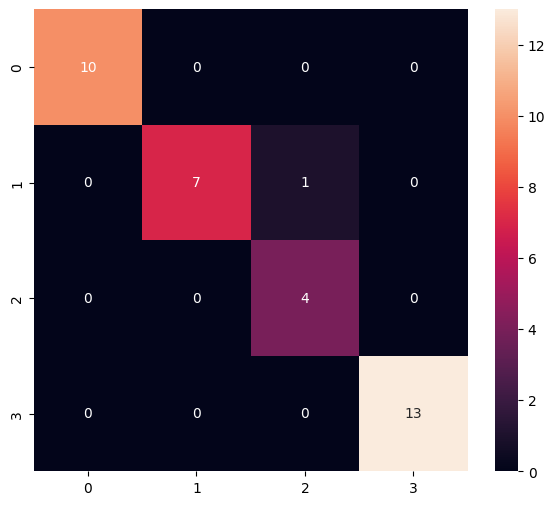

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.88      0.93         8
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13

    accuracy                           0.97        35
   macro avg       0.95      0.97      0.96        35
weighted avg       0.98      0.97      0.97        35



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:
model.save(model_save_path, include_optimizer=False)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpk1_k4j4l\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpk1_k4j4l\assets


6544

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.9216472e-05 9.5821614e-04 1.8696099e-03 9.9715292e-01]
3
